In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite

from astropy import units as u
from astropy import constants as const
import numpy as np

In [2]:
# Import lmfit to fit a guassian to each specrtrum:
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel

In [3]:
# Load the 67 Data:
OHdata67 = ascii.read('C:/Users/seven/OneDrive/Documents/OH Data 1665 Profile/OH199070p2800_65.ascii', data_start=4)
vel67 = OHdata67['col1']
Ta67 = OHdata67['col2']

# Galactic range choice:
igood = np.where((vel67 >= -400) & (vel67 <= 400))
# Select Galactic range:
vel67 = vel67[igood]
Ta67 = Ta67[igood]

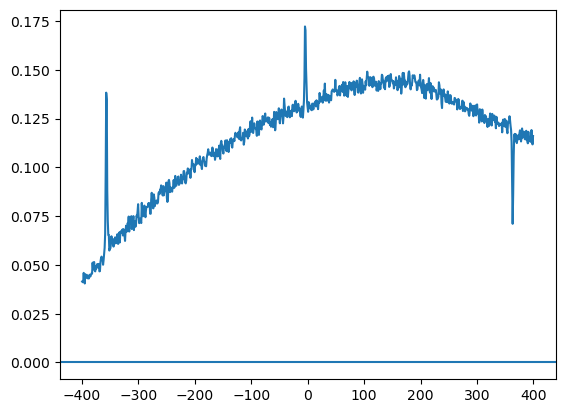

In [4]:
plt.plot(vel67, Ta67)
plt.axhline(0)

In [5]:
# Fitting the background:
mod = PolynomialModel(degree=4)

# Baseline regions:
igoodNeg = list(np.where((vel67 >= -400) & (vel67 <= -10))[0])
igoodPos = list(np.where((vel67 >= 30) & (vel67 <= 400))[0])

igood = igoodNeg+igoodPos

# Do the fitting:
pars = mod.guess(Ta67[igood], x=vel67[igood])
out = mod.fit(Ta67[igood], pars, x=vel67[igood])

In [6]:
print(out.fit_report(min_correl=0.3))

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 820
    # variables        = 5
    chi-square         = 0.02591475
    reduced chi-square = 3.1797e-05
    Akaike info crit   = -8487.04268
    Bayesian info crit = -8463.49616
    R-squared          = 0.95947213
[[Variables]]
    c0:  0.13409144 +/- 3.9574e-04 (0.30%) (init = 0.1340914)
    c1:  1.1011e-04 +/- 2.0795e-06 (1.89%) (init = 0.0001101119)
    c2: -3.4171e-07 +/- 1.4872e-08 (4.35%) (init = -3.417114e-07)
    c3: -2.0402e-10 +/- 1.9852e-11 (9.73%) (init = -2.040187e-10)
    c4: -1.1009e-13 +/- 1.0201e-13 (92.65%) (init = -1.100939e-13)
[[Correlations]] (unreported correlations are < 0.300)
    C(c2, c4) = -0.9600
    C(c1, c3) = -0.9166
    C(c0, c2) = -0.7755
    C(c0, c4) = +0.6357


(0.0, 0.2)

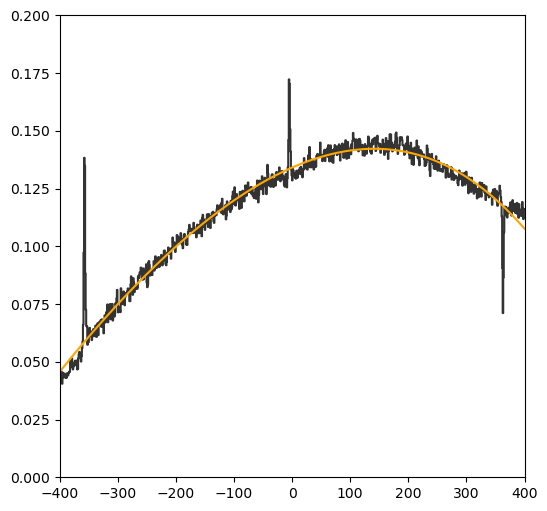

In [7]:
x = np.linspace(-400, 400, 863)
y_eval = mod.eval(pars, x=x)

igood = list(np.where((vel67 >= -400) & (vel67 <= 400))[0])

fig, ax = plt.subplots(figsize=(6,6))
ax.step(vel67[igood], Ta67[igood], color='k', alpha=0.8, ls='solid')

plt.plot(x, y_eval, 'orange')
ax.set_xlim([-400, 400])
ax.set_ylim([0, 0.2])

In [8]:
len(vel67)

863

In [9]:
vel67[1]-vel67[0]

0.9269706013548102

(-0.02, 0.2)

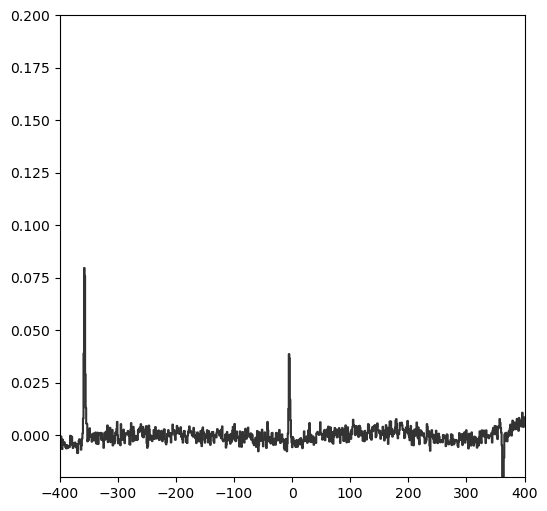

In [10]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.step(vel67[igood], Ta67[igood]-y_eval, color='k', alpha=0.8, ls='solid')
ax.set_xlim([-400, 400])
ax.set_ylim([-0.02, 0.2])

In [11]:
len(Ta67)

863

In [12]:
len(Ta67[igood])

863

In [13]:
len(vel67[igood])

863

In [14]:
#subtracting order 6 polynomial
Ta67sub = Ta67[igood]-y_eval

In [15]:
# Fitting the background:
mod = PolynomialModel(degree=7)

# Baseline regions:
igoodNeg = list(np.where((vel67 >= -300) & (vel67 <= -20))[0])
igoodPos = list(np.where((vel67 >= 30) & (vel67 <= 300))[0])

igood = igoodNeg + igoodPos

# Do the fitting:
pars = mod.guess(Ta67sub[igood], x=vel67[igood])
out = mod.fit(Ta67sub[igood], pars, x=vel67[igood])

In [16]:
len(Ta67sub)

863

(-0.02, 0.2)

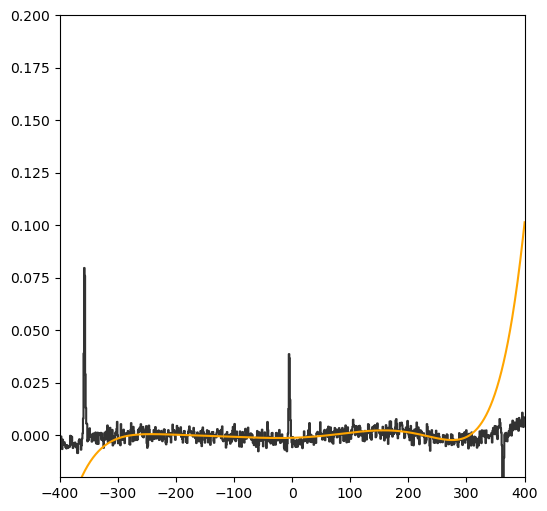

In [17]:
x = np.linspace(-400, 400, 863)
y_eval = mod.eval(pars, x=x)

igood = list(np.where((vel67 >= -400) & (vel67 <= 400))[0])

fig, ax = plt.subplots(figsize=(6,6))
ax.step(vel67, Ta67sub, color='k', alpha=0.8, ls='solid')

plt.plot(x, y_eval, 'orange')
ax.set_xlim([-400, 400])
ax.set_ylim([-0.02, 0.2])

In [18]:
Ta67sub = Ta67sub-y_eval

(-0.02, 0.2)

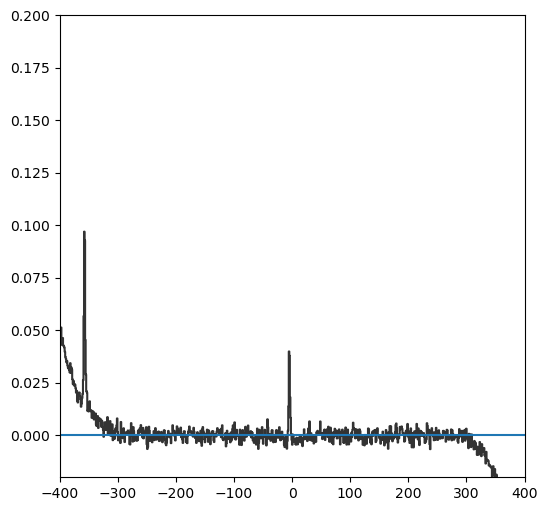

In [19]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.step(vel67, Ta67sub, color='k', alpha=0.8, ls='solid')
ax.axhline(0)
ax.set_xlim([-400, 400])
ax.set_ylim([-0.02, 0.2])

In [20]:
from scipy.optimize import curve_fit

def Gauss(x, A, B, C):
    #y = A*np.exp(-1*B*x**2)
    y = A*np.exp(-(x-B)**2 / (2.*C**2))
    return y

In [21]:
# igood statements for OH features:
igood1 = np.where((vel67 >= -20) & (vel67 <= 0))[0]
igood2 = np.where((vel67 >= -400) & (vel67 <= -350))[0] # Inter-arm feature
#igood3 = np.where((vel67 >= 350) & (vel67 <= 400))[0] # Perseus Arm
#igoodOut = np.where((vel67 >= -90) & (vel67 <= -75))[0] # Outer Arm

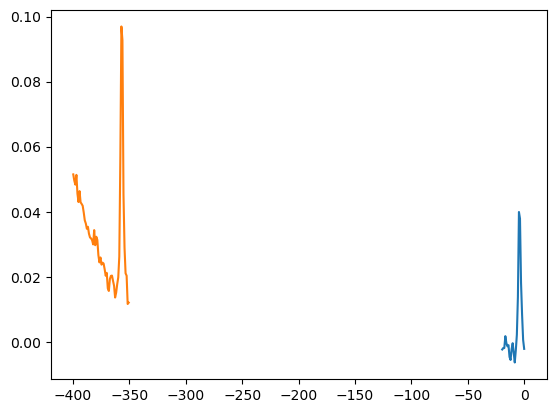

In [22]:
plt.plot(vel67[igood1], Ta67sub[igood1])
plt.plot(vel67[igood2], Ta67sub[igood2])
#plt.plot(vel67[igoodPer], Ta67sub[igoodPer])
#plt.plot(vel67[igoodOut], Ta67sub[igoodOut])

In [23]:
# Note: It is very important to pass initial guesses to curve_fit!

# Fitting the Gaussian for the Local Arm feature:
parameters1, covariance1 = curve_fit(Gauss, vel67[igood1], Ta67sub[igood1], p0=[0.03, 0, 4])
fit1A = parameters1[0]
fit1B = parameters1[1]
fit1C = parameters1[2]
fit_1y = Gauss(vel67, fit1A, fit1B, fit1C)

# Fitting the Gaussian for the Inter Arm feature:
#parameters2, covariance2= curve_fit(Gauss, vel67[igood2], Ta67sub[igood2], p0=[0.05, -400, -350])
#fit2A = parameters2[0]
#fit2B = parameters2[1]
#fit2C = parameters2[2]
#fit_2y = Gauss(vel67, fit2A, fit2B, fit2C)
#
# Fitting the Gaussian for the Perseus Arm feature:
#parametersPer, covariancePer = curve_fit(Gauss, vel67[igoodPer], Ta67sub[igoodPer], p0=[0.03, -63, 4])
#fitPerA = parametersPer[0]
#fitPerB = parametersPer[1]
#fitPerC = parametersPer[2]
#fit_Pery = Gauss(vel67, fitPerA, fitPerB, fitPerC)

# Fitting the Gaussian for the Outer Arm feature:
#parametersOut, covarianceOut = curve_fit(Gauss, vel67[igoodOut], Ta67sub[igoodOut], p0=[0.015, -81, 2])
#fitOutA = parametersOut[0]
#fitOutB = parametersOut[1]
#fitOutC = parametersOut[2]
#fit_Outy = Gauss(vel67, fitOutA, fitOutB, fitOutC)

In [25]:
print(parameters1)
#print(parameters2)
#print(parametersPer)
#print(parametersOut)

[ 0.04266775 -4.25908054 -1.02974865]


In [26]:
print(covariance1)
print(covariance2)
#print(covariancePer)
#print(covarianceOut)

[[ 7.09603237e-06 -4.36001521e-08  1.14352852e-04]
 [-4.36001521e-08  5.50442386e-03 -1.93181310e-06]
 [ 1.14352852e-04 -1.93181310e-06  5.51830439e-03]]


NameError: name 'covariance2' is not defined

Text(0.5, 1.0, 'OH 65 119070p2800')

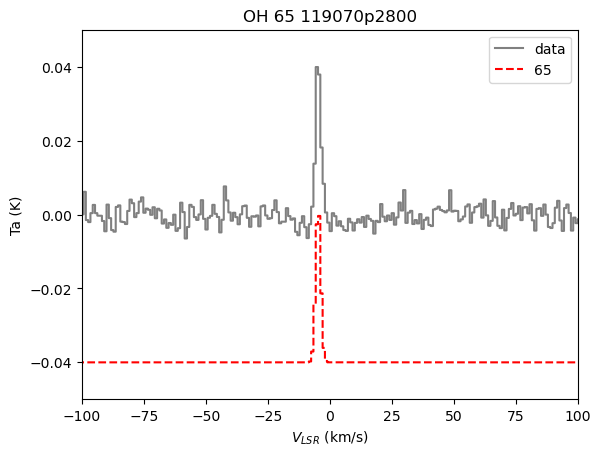

In [44]:
# Plot the result:
plt.step(vel67, Ta67sub, 'grey', label = 'data')
plt.step(vel67, fit_1y - 0.04, 'red', ls='dashed', label='65',)
#plt.step(vel67, fit_2y, 'orange', label='Interarm')
#plt.step(vel67, fit_Pery, 'green', label='Perseus')
#plt.step(vel67, fit_Outy, 'red', label='Outer')
#plt.step(vel67, y_geval, 'red', label = 'lmfit')
# What we want to do is get ranges for the other fits from 
plt.xlim([-100,100])
plt.ylim([-0.05, 0.05])
plt.legend()
plt.legend(loc = 'best')
plt.xlabel(r'$V_{LSR}$ (km/s)')
plt.ylabel('Ta (K)')
fig.tight_layout()
plt.title('OH 65 119070p2800')

In [51]:
integral1 = np.sum(Ta67sub[igood1])*(vel67[1]-vel67[0])
print(integral1)
print(integral1*2.3e14)
err = np.sqrt(len(vel67[igood1])*np.std(Ta67[igood]))
print(err)

0.0794437171962701
18272054955142.12
0.48659467421392005


In [46]:
#baseline region noise
igood = np.where((vel67 >= -300) & (vel67 <= -150))[0]
np.std(Ta67sub[igood])

0.0024454223868493993

In [47]:
# Number of channels in Local Profile intergral
print(len(vel67[igoodLoc]))
print(np.sqrt(len(vel67[igoodLoc])) * np.std(Ta67sub[igood]))
err = np.sqrt(len(vel67[igoodLoc])) * np.std(Ta67sub[igood])

NameError: name 'igoodLoc' is not defined

In [52]:
# Signal/Noise (integral/err)
integral1/err

0.1632646664795688